In [1]:
%display latex

# 1) Choose your of the An type quiver

In [8]:
def Quiver(L):
    Q = DiGraph(len(L)+1)
    for i in range(len(L)) :
        if L[i] : Q.add_edge(i,i+1)
        else : Q.add_edge(i+1,i)
    return Q

def Draw_quiver(L):
    return Q.plot(vertex_size = 500, vertex_color = 'red', edge_color = 'black')

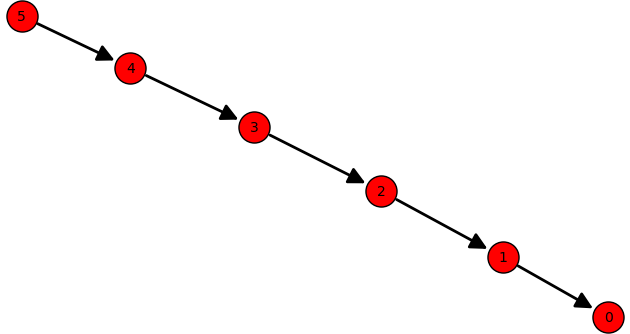

In [9]:
L = [0,0,0,0,0]
Q = Quiver(L); Draw_quiver(L)

# 2) Calculate the Auslander--Reiten quiver of your chosen quiver

In [10]:
#Sources of the AR quiver
def projective_indecomposable(L,i):
    j0,j1=i,i
    d0,d1=1,1
    while d0 and j0 > 0:
        d0 = L[j0-1] == 0
        j0-=1
    while d1 and j1 < len(L) :
        d1 = L[j1] == 1
        j1+=1
    if d0 and d1 : return (0,len(L))
    elif d0 : return (0,j1-1)
    elif d1 : return (j0+1,len(L))
    else : return (j0+1,j1-1)

#Sinks of the AR quiver    
def injective_indecomposable(L,i):
    j0,j1=i,i
    d0,d1=1,1
    while d0 and j0 > 0:
        d0 = L[j0-1] == 1
        j0-=1
    while d1 and j1 < len(L) :
        d1 = L[j1] == 0
        j1+=1
    if d0 and d1 : return (0,len(L))
    elif d0 : return (0,j1-1)
    elif d1 : return (j0+1,len(L))
    else : return (j0+1,j1-1)

#Arrow of the AR quiver
def add_hook_left(L,t):
    if t[0] == 0 : return t
    elif L[t[0]-1] == 1 :
        d=1
        j=1
        while d and t[0]-j > 0:
            d = L[t[0]-j-1] == 0
            if d : j+=1
        return (t[0]-j,t[1])
    else : return t
    
def add_hook_right(L,t):
    if t[1] == len(L) : return t
    elif L[t[1]] == 0 :
        d=1
        j=1
        while d and t[1]+j < len(L) :
            d = L[t[1]+j] == 1
            if d : j+=1
        return (t[0],t[1]+j)
    else : return t

def delete_cohook_left(L,t):
    if t[0]==len(L) : return t
    elif L[t[0]] == 0 and t[0] < t[1]: return (t[0]+1,t[1])
    elif L[t[0]] == 1 :
        d=1
        j=1
        while d and t[0]+j < min(t[1]+1,len(L)):
            d = L[t[0]+j] == 1
            j+=1
        if t[0]+j < t[1]+1 and not(d) : return (t[0]+j,t[1])
        else : return t
    else : return t
    
def delete_cohook_right(L,t):
    if t[1]==0 : return t
    elif L[t[1]-1] == 1 and t[0] < t[1] : return (t[0],t[1]-1)
    elif L[t[1]-1] == 0 :
        d=1
        j=1
        while d and t[1]-j > t[0]:
            d = L[t[1]-j-1] == 0
            j+=1
        if t[1]-j > t[0]-1 and not(d): return (t[0],t[1]-j)
        else : return t
    else : return t
    
def AR_translate_inv(L,s):
    sh = add_hook_right(L,s)
    if sh == s :
        hs = add_hook_left(L,s)
        if hs == s:
            sc = delete_cohook_right(L,s)
            if sc == s : return None
            else :
                csc = delete_cohook_left(L,sc)
                if csc == sc : return None
                else : return csc
        else : 
            hsc = delete_cohook_right(L,hs)
            if hsc == hs : return None
            else : return hsc
    else :
        hsh = add_hook_left(L,sh)
        if hsh == sh:
            csh = delete_cohook_left(L,sh)
            if csh == sh : return None
            else : return csh
        else : return hsh

#Calculate the AR quiver
def AR_quiver(L):
    n = len(L)
    Q = DiGraph()
    for i in range(n+1):
        for j in range(n+1):
            if not((min(i,j),max(i,j)) in Q.vertices()) :
                Q.add_vertex((min(i,j),max(i,j)))
    for t in Q.vertices() :
        if add_hook_left(L,t) != t : Q.add_edge(t,add_hook_left(L,t))
        elif delete_cohook_left(L,t) != t : Q.add_edge(t,delete_cohook_left(L,t))
        if add_hook_right(L,t) != t : Q.add_edge(t,add_hook_right(L,t))
        elif delete_cohook_right(L,t) != t : Q.add_edge(t,delete_cohook_right(L,t))
        tauinvt = AR_translate_inv(L,t)
        if type(tauinvt)!=type(None): 
             Q.add_edge(tauinvt,t, "AR_tau")
    return Q

#Draw a (beautiful) AR quiver
from sage.graphs.graph_plot import GraphPlot
def Draw_AR_quiver(L):
    QQ = AR_quiver(L)
    if type(QQ) == type(None): return None
    else :
        ninp = [v for v in QQ.vertices() if len([a for a in QQ.incoming_edges(v) if a[2]=='AR_tau']) !=0 and len([a for a in QQ.outgoing_edges(v) if a[2]=='AR_tau']) !=0 ]
        nip = [v for v in QQ.vertices() if len([a for a in QQ.incoming_edges(v) if a[2]=='AR_tau']) !=0 and len([a for a in QQ.outgoing_edges(v) if a[2]=='AR_tau']) ==0 ]
        inp = [v for v in QQ.vertices() if len([a for a in QQ.incoming_edges(v) if a[2]=='AR_tau']) ==0 and len([a for a in QQ.outgoing_edges(v) if a[2]=='AR_tau']) !=0 ]
        ip = [v for v in QQ.vertices() if len([a for a in QQ.incoming_edges(v) if a[2]=='AR_tau']) ==0 and len([a for a in QQ.outgoing_edges(v) if a[2]=='AR_tau']) ==0 ]
        l = max([len(q) for q in QQ.vertices()])
        options = {
        'vertex_size': 200*(l+1),
        'vertex_labels': True,
        'vertex_colors': {'#FFFFFF': ninp, '#FF0000': nip, '#00FF00' : inp , '#0000FF' : ip },
        'layout': None,
        'edge_style': 'solid',
        'edge_color': None,
        'edge_colors': {'red':[e for e in QQ.edges() if e[2] == 'AR_tau'], 'black':[e for e in QQ.edges() if e[2] != 'AR_tau']},
        'edge_labels': False,
        'iterations': 50,
        'tree_orientation': 'down',
        'heights': None,
        'graph_border': False,
        'talk': False,
        'color_by_label': None,
        'partition': None,
        'dist': .075,
        'max_dist': 1.5,
        'loop_size': .075,
        'edge_labels_background': 'transparent'}
        return GraphPlot(QQ,options).show()

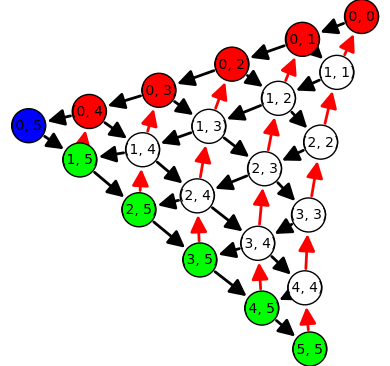

In [11]:
Draw_AR_quiver(L)

# 3) Take the subquiver (saw as a subposet) generated by a fixed collection of vertices.

In [12]:
#Calculate the subquiver of the AR quiver given a collection C of vertices
#Note : we delete the arrows corresponding to the AR translation -- which is not useful in the following
def AR_quiver_subcategory(L,C):
    Q = AR_quiver(L)
    Q.delete_edges([e for e in Q.edges() if e[2] == "AR_tau"])
    return DiGraph((Poset(Q).subposet(C)).hasse_diagram())

def Draw_AR_subquiv(L,C):
    QQ = AR_quiver_subcategory(L,C)
    if type(QQ) == type(None): return None
    else :
        l = max([len(q) for q in QQ.vertices()])
        options = {
        'vertex_size': 200*(l+1),
        'vertex_labels': True,
        'vertex_color': 'white',
        'layout': None,
        'edge_style': 'solid',
        'edge_color': None,
        'edge_color': 'black',
        'edge_labels': False,
        'iterations': 50,
        'tree_orientation': 'down',
        'heights': None,
        'graph_border': False,
        'talk': False,
        'color_by_label': None,
        'partition': None,
        'dist': .075,
        'max_dist': 1.5,
        'loop_size': .075,
        'edge_labels_background': 'transparent'}
        return GraphPlot(QQ,options).show()

In [13]:
#Check if an indecomposable representation t is supported at the vertex i
def Indec_is_supported(t,i) :
    return t[0]-1 < i < t[1]+1

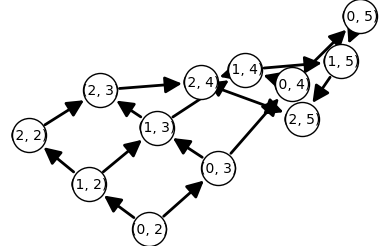

In [14]:
#Example of a subquiver we use to calculate the generic Jordan form data of a representation
Draw_AR_subquiv(L,[t for t in AR_quiver(L).vertices() if Indec_is_supported(t,2)])

# 4) Some tools for generating representations in a fixed category

In [15]:
def Vectrep_to_rep(Cat,V):
    return [[V[i],Cat[i]] for i in range(len(V))]

def dim_vector(L,Rep):
    T = []
    for i in range(len(L)+1):
        S = 0
        for R in Rep :
            if R[1][0]-1 < i < R[1][1]+1 :  S+=R[0]
        T.append(S)
    return vector(T)

In [16]:
Cat = [(0,1),(1,1),(3,3),(3,4),(1,3),(1,4),(0,3),(0,4)]
V = vector([1,2,1,2,1,2,1,1])
Rep = Vectrep_to_rep(Cat,V); Rep

[[1, (0, 1)],
 [2, (1, 1)],
 [1, (3, 3)],
 [2, (3, 4)],
 [1, (1, 3)],
 [2, (1, 4)],
 [1, (0, 3)],
 [1, (0, 4)]]

In [17]:
dim_vector(L,Rep)

(3, 8, 5, 8, 5, 0)

# 5) We set up the path calculations for GenJF

In [18]:
def support_multi_path(M):
    S = Set()
    for P in M :
        S = S.union(Set(P))
    return S

def multi_path_weight(L,Rep,M):
    S = support_multi_path(M)
    T = 0
    for R in Rep :
        if R[1] in S : T+=R[0]
    return T

def maximal_weight_multi_paths(L,Rep,q,k):
    Z = AR_quiver_subcategory(L,[t for t in AR_quiver(L).vertices() if Indec_is_supported(t,q)])
    paths = Z.all_paths(Z.sources()[0],Z.sinks()[0])
    S = Set([i for i in range(0,len(paths))])
    Multik = [[paths[i] for i in s] for s in S.subsets(k)]
    return max([multi_path_weight(L,Rep,m) for m in Multik]+[-1])

def Partitions(L,Rep,q):
    T = []
    d = True
    k = 1
    while d :
        if k==1 :
            a = maximal_weight_multi_paths(L,Rep,q,k)
        else :
            a = maximal_weight_multi_paths(L,Rep,q,k) - sum(T)
        if a < 1 :
            d = False
        else :
            T.append(a)
            k+=1
    return T

def GenJF(L,Rep):
    return [Partitions(L,Rep,q) for q in range(len(L)+1)]

In [19]:
GenJF(L,Rep)

[[3], [6, 2], [4, 1], [6, 2], [5], []]

# 6) Quick (and smart) test to know the category we choose is Jordan recoverable

It does not prove that a category $\mathscr{C}$ is Jordan recoverable, but if $\mathscr{C}$ passes it succesfully, we can stongly believe that it should be Jordan recoverable.

In [20]:
#Allows us to determine all the representations in a fixed category which have the same dimension vector V
def rep_in_cat_with_same_dim_vect(L,Cat,V):
    D = [dim_vector(L,[[1,t]]) for t in Cat]
    Mat = matrix([[D[i][j] for j in range(len(L)+1)] for i in range(len(D))])
    K= [v for v in (kernel(Mat)).gens()]
    W = Mat.solve_left(V)
    P = Polyhedron(vertices = [vector(W)], rays = [vector(k) for k in K] + [-vector(k) for k in K], base_ring=ZZ)
    Octant = Polyhedron(vertices = [vector([0 for i in range(len(D))])],rays=[vector([int(i==j) for i in range(len(D))]) for j in range(len(D))], base_ring=ZZ)
    Points = (P.intersection(Octant)).integral_points()
    return [Vectrep_to_rep(Cat,v) for v in Points] 

In [21]:
Cat = [(0,1),(1,1),(3,3),(3,4),(1,3),(1,4),(0,3),(0,4)]
V = vector(dim_vector(L,Vectrep_to_rep(Cat,[1,2,1,1,1,2,2,1])))
Liste = rep_in_cat_with_same_dim_vect(L,Cat,V); 
for x in Liste : show(x)

[[0, (0, 1)],
 [3, (1, 1)],
 [0, (3, 3)],
 [2, (3, 4)],
 [0, (1, 3)],
 [2, (1, 4)],
 [4, (0, 3)],
 [0, (0, 4)]]

[[0, (0, 1)],
 [3, (1, 1)],
 [0, (3, 3)],
 [2, (3, 4)],
 [1, (1, 3)],
 [1, (1, 4)],
 [3, (0, 3)],
 [1, (0, 4)]]

[[0, (0, 1)],
 [3, (1, 1)],
 [0, (3, 3)],
 [2, (3, 4)],
 [2, (1, 3)],
 [0, (1, 4)],
 [2, (0, 3)],
 [2, (0, 4)]]

[[1, (0, 1)],
 [2, (1, 1)],
 [0, (3, 3)],
 [2, (3, 4)],
 [1, (1, 3)],
 [2, (1, 4)],
 [3, (0, 3)],
 [0, (0, 4)]]

[[1, (0, 1)],
 [2, (1, 1)],
 [0, (3, 3)],
 [2, (3, 4)],
 [2, (1, 3)],
 [1, (1, 4)],
 [2, (0, 3)],
 [1, (0, 4)]]

[[1, (0, 1)],
 [2, (1, 1)],
 [0, (3, 3)],
 [2, (3, 4)],
 [3, (1, 3)],
 [0, (1, 4)],
 [1, (0, 3)],
 [2, (0, 4)]]

[[2, (0, 1)],
 [1, (1, 1)],
 [0, (3, 3)],
 [2, (3, 4)],
 [2, (1, 3)],
 [2, (1, 4)],
 [2, (0, 3)],
 [0, (0, 4)]]

[[2, (0, 1)],
 [1, (1, 1)],
 [0, (3, 3)],
 [2, (3, 4)],
 [3, (1, 3)],
 [1, (1, 4)],
 [1, (0, 3)],
 [1, (0, 4)]]

[[2, (0, 1)],
 [1, (1, 1)],
 [0, (3, 3)],
 [2, (3, 4)],
 [4, (1, 3)],
 [0, (1, 4)],
 [0, (0, 3)],
 [2, (0, 4)]]

[[3, (0, 1)],
 [0, (1, 1)],
 [0, (3, 3)],
 [2, (3, 4)],
 [3, (1, 3)],
 [2, (1, 4)],
 [1, (0, 3)],
 [0, (0, 4)]]

[[3, (0, 1)],
 [0, (1, 1)],
 [0, (3, 3)],
 [2, (3, 4)],
 [4, (1, 3)],
 [1, (1, 4)],
 [0, (0, 3)],
 [1, (0, 4)]]

[[0, (0, 1)],
 [3, (1, 1)],
 [1, (3, 3)],
 [1, (3, 4)],
 [0, (1, 3)],
 [2, (1, 4)],
 [3, (0, 3)],
 [1, (0, 4)]]

[[0, (0, 1)],
 [3, (1, 1)],
 [1, (3, 3)],
 [1, (3, 4)],
 [1, (1, 3)],
 [1, (1, 4)],
 [2, (0, 3)],
 [2, (0, 4)]]

[[0, (0, 1)],
 [3, (1, 1)],
 [1, (3, 3)],
 [1, (3, 4)],
 [2, (1, 3)],
 [0, (1, 4)],
 [1, (0, 3)],
 [3, (0, 4)]]

[[1, (0, 1)],
 [2, (1, 1)],
 [1, (3, 3)],
 [1, (3, 4)],
 [0, (1, 3)],
 [3, (1, 4)],
 [3, (0, 3)],
 [0, (0, 4)]]

[[1, (0, 1)],
 [2, (1, 1)],
 [1, (3, 3)],
 [1, (3, 4)],
 [1, (1, 3)],
 [2, (1, 4)],
 [2, (0, 3)],
 [1, (0, 4)]]

[[1, (0, 1)],
 [2, (1, 1)],
 [1, (3, 3)],
 [1, (3, 4)],
 [2, (1, 3)],
 [1, (1, 4)],
 [1, (0, 3)],
 [2, (0, 4)]]

[[1, (0, 1)],
 [2, (1, 1)],
 [1, (3, 3)],
 [1, (3, 4)],
 [3, (1, 3)],
 [0, (1, 4)],
 [0, (0, 3)],
 [3, (0, 4)]]

[[2, (0, 1)],
 [1, (1, 1)],
 [1, (3, 3)],
 [1, (3, 4)],
 [1, (1, 3)],
 [3, (1, 4)],
 [2, (0, 3)],
 [0, (0, 4)]]

[[2, (0, 1)],
 [1, (1, 1)],
 [1, (3, 3)],
 [1, (3, 4)],
 [2, (1, 3)],
 [2, (1, 4)],
 [1, (0, 3)],
 [1, (0, 4)]]

[[2, (0, 1)],
 [1, (1, 1)],
 [1, (3, 3)],
 [1, (3, 4)],
 [3, (1, 3)],
 [1, (1, 4)],
 [0, (0, 3)],
 [2, (0, 4)]]

[[3, (0, 1)],
 [0, (1, 1)],
 [1, (3, 3)],
 [1, (3, 4)],
 [2, (1, 3)],
 [3, (1, 4)],
 [1, (0, 3)],
 [0, (0, 4)]]

[[3, (0, 1)],
 [0, (1, 1)],
 [1, (3, 3)],
 [1, (3, 4)],
 [3, (1, 3)],
 [2, (1, 4)],
 [0, (0, 3)],
 [1, (0, 4)]]

[[0, (0, 1)],
 [3, (1, 1)],
 [2, (3, 3)],
 [0, (3, 4)],
 [0, (1, 3)],
 [2, (1, 4)],
 [2, (0, 3)],
 [2, (0, 4)]]

[[0, (0, 1)],
 [3, (1, 1)],
 [2, (3, 3)],
 [0, (3, 4)],
 [1, (1, 3)],
 [1, (1, 4)],
 [1, (0, 3)],
 [3, (0, 4)]]

[[0, (0, 1)],
 [3, (1, 1)],
 [2, (3, 3)],
 [0, (3, 4)],
 [2, (1, 3)],
 [0, (1, 4)],
 [0, (0, 3)],
 [4, (0, 4)]]

[[1, (0, 1)],
 [2, (1, 1)],
 [2, (3, 3)],
 [0, (3, 4)],
 [0, (1, 3)],
 [3, (1, 4)],
 [2, (0, 3)],
 [1, (0, 4)]]

[[1, (0, 1)],
 [2, (1, 1)],
 [2, (3, 3)],
 [0, (3, 4)],
 [1, (1, 3)],
 [2, (1, 4)],
 [1, (0, 3)],
 [2, (0, 4)]]

[[1, (0, 1)],
 [2, (1, 1)],
 [2, (3, 3)],
 [0, (3, 4)],
 [2, (1, 3)],
 [1, (1, 4)],
 [0, (0, 3)],
 [3, (0, 4)]]

[[2, (0, 1)],
 [1, (1, 1)],
 [2, (3, 3)],
 [0, (3, 4)],
 [0, (1, 3)],
 [4, (1, 4)],
 [2, (0, 3)],
 [0, (0, 4)]]

[[2, (0, 1)],
 [1, (1, 1)],
 [2, (3, 3)],
 [0, (3, 4)],
 [1, (1, 3)],
 [3, (1, 4)],
 [1, (0, 3)],
 [1, (0, 4)]]

[[2, (0, 1)],
 [1, (1, 1)],
 [2, (3, 3)],
 [0, (3, 4)],
 [2, (1, 3)],
 [2, (1, 4)],
 [0, (0, 3)],
 [2, (0, 4)]]

[[3, (0, 1)],
 [0, (1, 1)],
 [2, (3, 3)],
 [0, (3, 4)],
 [1, (1, 3)],
 [4, (1, 4)],
 [1, (0, 3)],
 [0, (0, 4)]]

[[3, (0, 1)],
 [0, (1, 1)],
 [2, (3, 3)],
 [0, (3, 4)],
 [2, (1, 3)],
 [3, (1, 4)],
 [0, (0, 3)],
 [1, (0, 4)]]

In [22]:
def there_is_non_double(G):
    if len(G) < 2 : return True
    else :
        d = not(G[0] == G[1])
        i,j=0,1
        n = len(G)
        while d and (i < n-2 or j < n-1):
            i = i + (j+1)//n
            j = (j+1)%n + (i+1)*int(j+1 == n)
            d = not(G[i] == G[j])
        if d : return (d,None,None)
        else : return (d,i,j)
        
def random_rep_in_cat(Cat,n):
    return Vectrep_to_rep(Cat,vector([randint(0,n) for c in Cat]))

#Given N the number of GenJFs we have to calculate at most, and n, we test if a category Cat is JR by choosing randomly
#a representation in C (the number of copies of each indecomposable is between 0 and n), and we check if among the 
#representations in C having the same dimension vector, there are two of them which have the same GenJF or not.
def smart_test_JR(L,Cat,n,N):
    Tests = []
    GenJFs = []
    k = 0
    d = True
    while k < N and d :
        Rep = random_rep_in_cat(Cat,n)
        while Rep in Tests :
            Rep = random_rep_in_cat(Cat,n)
        V = dim_vector(L,Rep)
        SameVect = rep_in_cat_with_same_dim_vect(L,Cat,V)
        G = [GenJF(L,Rep) for Rep in SameVect]
        dd = there_is_non_double(G)
        if dd:
            Tests = Tests + SameVect
            GenJFs = GenJFs + G
            k+=len(G)
            print("Tested representations :",k,"over",N)
                
        else :
            d = dd[0] 
    if not(d) : return (d,Samevect[dd[1]],SameVect[dd[2]])
    else : return (d,None,None)

Note : We must avoid to choose big values of $n$ or of $N$.
In general, for small value of $n$ (bigger than $2$), and $N$ around $1000$, if a category is not Jordan recoverable, the algorithm above finds a pair of representations that have the same GenJF pretty quickly.

In [17]:
smart_test_JR(L,Cat,4,1000)

Tested representations : 40 over 1000
Tested representations : 133 over 1000
Tested representations : 206 over 1000
Tested representations : 287 over 1000
Tested representations : 322 over 1000
Tested representations : 342 over 1000
Tested representations : 382 over 1000
Tested representations : 410 over 1000
Tested representations : 439 over 1000
Tested representations : 493 over 1000
Tested representations : 585 over 1000
Tested representations : 655 over 1000
Tested representations : 657 over 1000
Tested representations : 684 over 1000
Tested representations : 690 over 1000
Tested representations : 720 over 1000
Tested representations : 772 over 1000
Tested representations : 803 over 1000
Tested representations : 829 over 1000
Tested representations : 839 over 1000
Tested representations : 848 over 1000
Tested representations : 878 over 1000
Tested representations : 888 over 1000
Tested representations : 1013 over 1000


(True, None, None)

# 7) Choosing and testing any subcategory

In [23]:
def random_cat(L):
    Cat = []
    n = len(L)
    for i in range(len(L)):
        for j in range(i,len(L)):
            if randint(0,1) == 1 : Cat.append((i,j))
    return Cat

In [24]:
Cat = random_cat(L)
show(Cat)
smart_test_JR(L,Cat,4,1000)

[(0, 1), (0, 4), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3), (4, 4)]

Tested representations : 95 over 1000
Tested representations : 239 over 1000
Tested representations : 308 over 1000
Tested representations : 503 over 1000
Tested representations : 701 over 1000
Tested representations : 705 over 1000
Tested representations : 731 over 1000
Tested representations : 830 over 1000
Tested representations : 904 over 1000
Tested representations : 994 over 1000
Tested representations : 1109 over 1000


(True, None, None)

Tested representations : 851 over 1000
Tested representations : 852 over 1000
Tested representations : 853 over 1000
Tested representations : 854 over 1000
Tested representations : 855 over 1000
Tested representations : 856 over 1000
Tested representations : 857 over 1000
Tested representations : 858 over 1000
Tested representations : 859 over 1000
Tested representations : 860 over 1000
Tested representations : 861 over 1000
Tested representations : 862 over 1000
Tested representations : 863 over 1000
Tested representations : 864 over 1000
Tested representations : 865 over 1000
Tested representations : 866 over 1000
Tested representations : 867 over 1000
Tested representations : 868 over 1000
Tested representations : 869 over 1000
Tested representations : 870 over 1000
Tested representations : 871 over 1000
Tested representations : 872 over 1000
Tested representations : 873 over 1000
Tested representations : 874 over 1000
Tested representations : 875 over 1000
Tested representations : 

(True, None, None)

# 8) Generating the CJR categories.

There are those for which we know everything is going well [Deq23 - Canonically Jordan recoverable...].

In [20]:
#Given a bipartition of {0,...,n+1}, it gives a maximal canonically Jordan recoverable category in an A_n type quiver
#If you choose B and E as subsets of {0,...,n+1} with no intersection, we still end up with a CJR category.
def CJR(B,E):
    L = []
    for b in B:
        for e in E:
            if b<e: L.append((b,e-1))
    return L

In [21]:
Cat = CJR([0,2,3],[1,4,5,6]);Cat

[(0, 0),
 (0, 3),
 (0, 4),
 (0, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 3),
 (3, 4),
 (3, 5)]

In [22]:
smart_test_JR(L,Cat,4,1000)

Tested representations : 243 over 1000
Tested representations : 863 over 1000
Tested representations : 1058 over 1000


(True, None, None)

# 9) Testing JR conjectural condition

Here are checking that the conjecture I gave for JR categories holds :

$\textbf{Conjecture :}$ A category $\mathscr{C}$ is Jordan recoverable if, and only if, the set of intervals correspondings to indecomposables representations in $\mathscr{C}$, written $\operatorname{Int}(\mathscr{C})$, is double-covering avoiding.
It means that, for any interval $I \subseteq \{0,\ldots,n\}$ there exists at most one set partition $\{J_1,\ldots,J_p\}$ such that $J_k \in \operatorname{Int}(\mathscr{C})$ for all $k \in \{1,\ldots, p\}$.


In [5]:
@cached_function
def Intervals_decompositions(t):
    if t[0] == t[1] : return [[t]]
    else :
        L = []
        for i in range(t[0],t[1]+1):
            for j in range(i,t[1]+1):
                if (i,j) == t: L.append([t])
                elif i == t[0] : 
                    List1 = Intervals_decompositions((j+1,t[1]))
                    for l in List1 :
                        u = [(t[0], j)]+l
                        if not(u in L) : L.append(u)
                elif j == t[1]:
                    List1 = Intervals_decompositions((t[0],i-1))
                    for l in List1 :
                        v = l + [(i,t[1])]
                        if not(v in L) : L.append(v)
                else :
                    List1 = Intervals_decompositions((t[0],i-1))
                    List2 = Intervals_decompositions((j+1,t[1]))
                    for l in List1 :
                        for m in List2:
                            w = l + [(i,j)]+ m
                            if not(w in L): L.append(w)
        return L
    
def Test_conj_JR(L,Cat):
    if len(Cat) < 3 : return True
    else :
        d = True
        i=0
        j=1
        while d and i < len(L)+1 and j < len(L)+1:
            Int = Intervals_decompositions((i,j))
            Decomp_in_Cat = [D for D in Int if prod([int(t in Cat) for t in D])==1]
            if len(Decomp_in_Cat)>1 : 
                d = False
            else :
                if j < len(L) : j+=1
                elif i < len(L)-1 : 
                    i+=1
                    j=i+1
                else : j+=1
        if d : return (d,None)
        else : return (d,Decomp_in_Cat)

In [26]:
Intervals_decompositions((1,4))

[[(1, 1), (2, 2), (3, 3), (4, 4)],
 [(1, 1), (2, 2), (3, 4)],
 [(1, 1), (2, 3), (4, 4)],
 [(1, 1), (2, 4)],
 [(1, 2), (3, 3), (4, 4)],
 [(1, 2), (3, 4)],
 [(1, 3), (4, 4)],
 [(1, 4)]]

In [25]:
#Research of a relevant example
d = False
while not(d) :
    Cat = random_cat(L)
    if len(Cat) > len(L): 
        #Make sure that the dimension vectors of the indecomposable representations in Cat are not linearly independant
        d = Test_conj_JR(L,Cat)[0]
show(Cat)

[(0, 1), (0, 3), (1, 1), (1, 3), (2, 4), (3, 3), (3, 4)]

In [ ]:
[1], [2], [1,2]

In [87]:
smart_test_JR(L,Cat,4,100)

Tested representations : 6 over 100
Tested representations : 8 over 100
Tested representations : 11 over 100
Tested representations : 13 over 100
Tested representations : 14 over 100
Tested representations : 18 over 100
Tested representations : 20 over 100
Tested representations : 21 over 100
Tested representations : 26 over 100
Tested representations : 30 over 100
Tested representations : 33 over 100
Tested representations : 37 over 100
Tested representations : 43 over 100
Tested representations : 44 over 100
Tested representations : 50 over 100
Tested representations : 51 over 100
Tested representations : 56 over 100
Tested representations : 60 over 100
Tested representations : 66 over 100
Tested representations : 71 over 100
Tested representations : 74 over 100
Tested representations : 77 over 100
Tested representations : 79 over 100
Tested representations : 86 over 100
Tested representations : 90 over 100
Tested representations : 92 over 100
Tested representations : 93 over 100
Tes

(True, None, None)

# 10) $\operatorname{RSK}_{\lambda, Q}$

In [138]:
#Choose a quiver
L = [1,0,0,1,0,1]
#Choose a partition such that the hook length is len(L)+1
Pi = [3,2,2,2]

In [139]:
def Bipartition(Pi):
    Pi2 = Pi[:]+[0]
    B = [0]
    E = [Pi[0] + len(Pi)]
    k=1
    for i in range(len(Pi2)-1):
        e = Pi2[i] - Pi2[i+1]
        while e > 0 :
            E.append(k)
            k+=1
            e-=1
        B.append(k)
        k+=1
    B.remove(Pi[0] + len(Pi))
    return (B, sorted(E))

In [140]:
Bipart = Bipartition(Pi); Bipart

([0, 2, 3, 4], [1, 5, 6, 7])

In [141]:
Cat = CJR(Bipart[0],Bipart[1]); Cat

[(0, 0),
 (0, 4),
 (0, 5),
 (0, 6),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 4),
 (4, 5),
 (4, 6)]

In [142]:
#Choose a filling
Rep = random_rep_in_cat(Cat,10);Rep

[[9, (0, 0)],
 [2, (0, 4)],
 [10, (0, 5)],
 [4, (0, 6)],
 [10, (2, 4)],
 [10, (2, 5)],
 [5, (2, 6)],
 [8, (3, 4)],
 [6, (3, 5)],
 [2, (3, 6)],
 [0, (4, 4)],
 [8, (4, 5)],
 [2, (4, 6)]]

In [143]:
#GenJF gives the reverse plane partition associated
GenJF(L,Rep)

[[25], [16], [27, 14], [33, 19, 5], [36, 22, 9], [36, 11], [13]]